<a href="https://colab.research.google.com/github/YUCAVALCANTE/ML_Studies/blob/main/Representa%C3%A7%C3%A3o%2C_PCA_manual%2C_visualiza%C3%A7%C3%A3o_geom%C3%A9trica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Gerando dados correlacionados | quando duas dimensões dizem quase a mesma coisa
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

altura = np.random.normal(175, 5, 200)
peso = altura * 0.5 + np.random.normal(0, 2, 200)

X = np.column_stack((altura, peso))


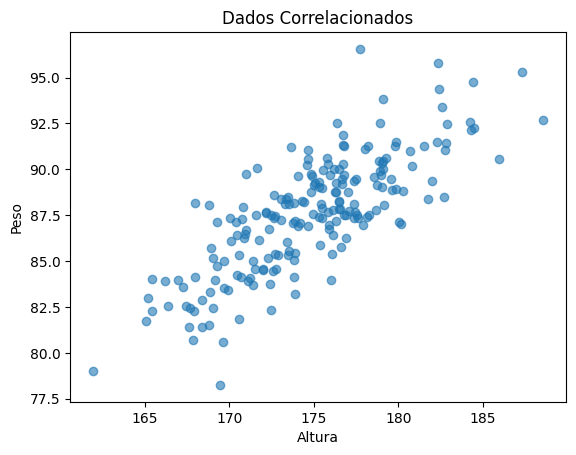

In [3]:
plt.scatter(X[:,0], X[:,1], alpha=0.6)
plt.xlabel("Altura")
plt.ylabel("Peso")
plt.title("Dados Correlacionados")
plt.show()

In [10]:
#PCA MANUAL
X_meaned = X - np.mean(X, axis=0)
cov_matrix = np.cov(X_meaned.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
sorted_index = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_index]
eigenvectors = eigenvectors[:, sorted_index]
Z = X_meaned.dot(eigenvectors[:,0])

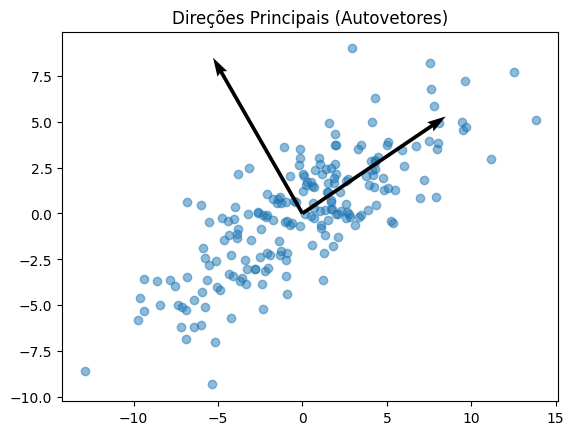

In [9]:
#Visualizando a rotação dos eixos

plt.scatter(X_meaned[:, 0], X_meaned[:, 1], alpha=0.5)

origin = np.mean(X_meaned, axis=0)

for i in range(2):
    vector = eigenvectors[:, i] * 10
    plt.quiver(0, 0, vector[0], vector[1],
               angles='xy', scale_units='xy', scale=1)

plt.title("Direções Principais (Autovetores)")
plt.show()


In [12]:
# Comparando com sklearn

from sklearn.decomposition import PCA

pca = PCA(n_components=1)

Z_sklearn = pca.fit_transform(X)
print("Variância explicada:", pca.explained_variance_ratio_)

Variância explicada: [0.90933417]


In [13]:
#mini autoencoder em PyTorch

import torch
import torch.nn as nn
import torch.optim as optim

X_tensor = torch.tensor(X_meaned, dtype=torch.float32)

class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Linear(2, 1)
        self.decoder = nn.Linear(1, 2)

    def forward(self, x):
        z = self.encoder(x)
        x_recon = self.decoder(z)
        return x_recon

model = Autoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Treinando:
for epoch in range(1000):
    optimizer.zero_grad()
    output = model(X_tensor)
    loss = criterion(output, X_tensor)
    loss.backward()
    optimizer.step()

# Extraindo representação aprendida:
with torch.no_grad():
    Z_auto = model.encoder(X_tensor)